In [ ]:
# download training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2022-12-23 17:20:51--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   178MB/s    in 0.8s    

2022-12-23 17:20:52 (178 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2022-12-23 17:21:04--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2022-12-23 17:21:05 (96.5 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [ ]:
# Unziping the archive files

import zipfile

with zipfile.ZipFile("./horse-or-human.zip", mode = "r") as archive:
    archive.extractall("horse-or-human")

In [ ]:
with zipfile.ZipFile("./validation-horse-or-human.zip", mode = "r") as archive:
    archive.extractall("validition-horse-or-human")

In [ ]:
# Creating the directories

import os


train_horse_dir = os.path.join('./horse-or-human/horses')

train_human_dir = os.path.join('./horse-or-human/humans')

validition_horse_dir = os.path.join('./validition-horse-or-human/horses')

validition_human_dir = os.path.join('./validition-horse-or-human/humans')

In [ ]:
# Number of pics

print(f'number of horses pics in train set: {len(os.listdir(train_horse_dir))}')
print(f'number of humans pics in train set: {len(os.listdir(train_human_dir))}')

print(f'number of horses pics in validition set: {len(os.listdir(validition_horse_dir))}')
print(f'number of humans pics in validition set: {len(os.listdir(validition_human_dir))}')

number of horses pics in train set: 500
number of humans pics in train set: 527
number of horses pics in validition set: 128
number of humans pics in validition set: 128


In [ ]:
# Name of the pics

print(f'name of horses pics in train set: {os.listdir(train_horse_dir)[0:10]}')
print(f'name of humans pics in train set: {os.listdir(train_human_dir)[0:10]}')
print(f'name of horses pics in validition set: {os.listdir(validition_horse_dir)[0:10]}')
print(f'name of humans pics in validition set: {os.listdir(validition_human_dir)[0:10]}')

name of horses pics in train set: ['horse14-3.png', 'horse10-3.png', 'horse39-9.png', 'horse22-7.png', 'horse21-7.png', 'horse17-6.png', 'horse45-3.png', 'horse38-5.png', 'horse22-5.png', 'horse14-7.png']
name of humans pics in train set: ['human14-05.png', 'human10-28.png', 'human02-13.png', 'human06-25.png', 'human16-08.png', 'human11-13.png', 'human01-08.png', 'human17-22.png', 'human12-24.png', 'human04-10.png']
name of horses pics in validition set: ['horse2-368.png', 'horse4-439.png', 'horse5-103.png', 'horse3-055.png', 'horse2-441.png', 'horse2-201.png', 'horse6-218.png', 'horse5-519.png', 'horse1-105.png', 'horse3-584.png']
name of humans pics in validition set: ['valhuman04-15.png', 'valhuman03-16.png', 'valhuman05-05.png', 'valhuman03-23.png', 'valhuman03-18.png', 'valhuman02-16.png', 'valhuman03-20.png', 'valhuman04-17.png', 'valhuman05-12.png', 'valhuman05-24.png']


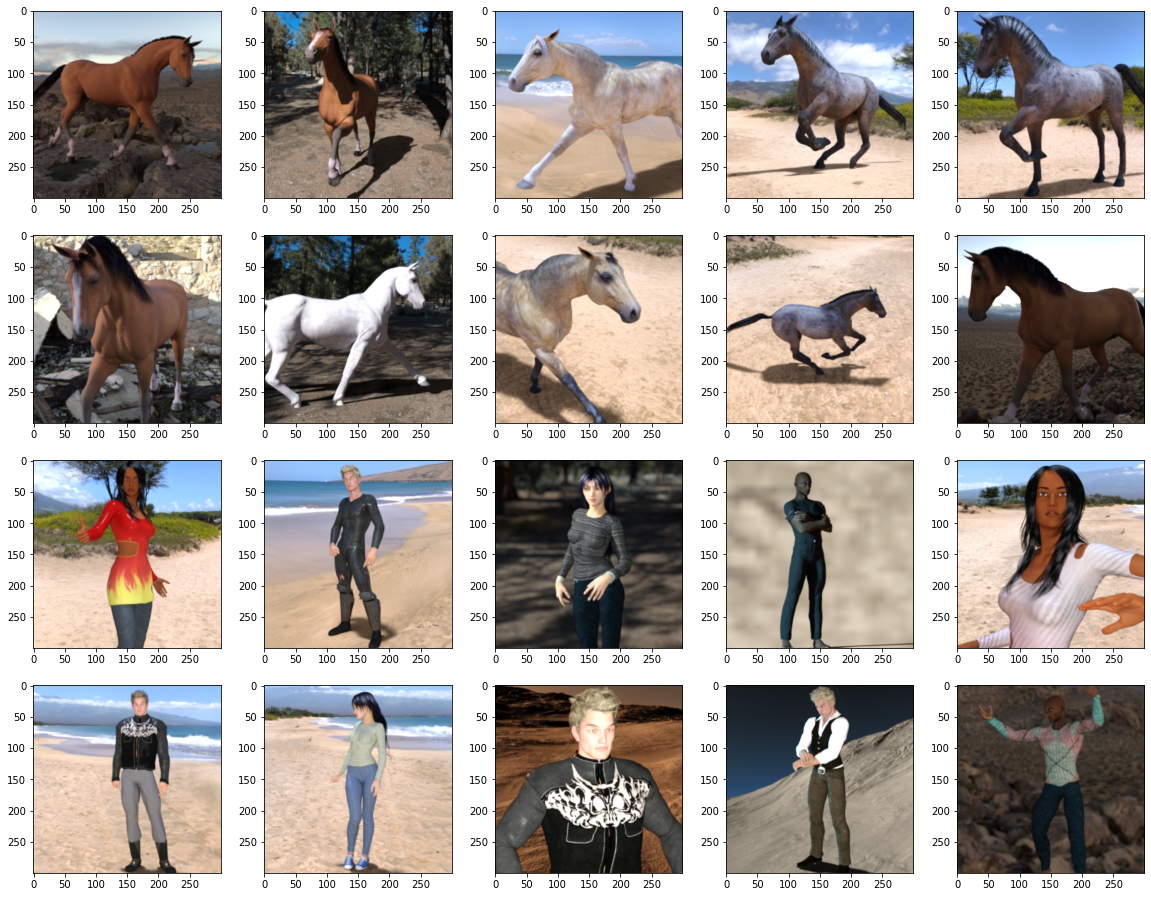

In [ ]:
# Plotting some of the images in train set

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.gcf()
fig.set_size_inches(20,20)

pic_index = 0

next_horse_pic = [os.path.join('./horse-or-human/horses', picname) for picname in os.listdir(train_horse_dir)[pic_index:pic_index+10]]
next_human_pic = [os.path.join('./horse-or-human/humans', picname) for picname in os.listdir(train_human_dir)[pic_index:pic_index+10]]

for i, pic_path in enumerate(next_horse_pic+next_human_pic):
    subplot = plt.subplot(5,5,i+1)
    pic = mpimg.imread(pic_path)
    plt.imshow(pic)


In [ ]:
# Building the model

from tensorflow.python.util.tf_decorator import TFDecorator
import tensorflow as tf

model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(300,300,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(16,(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 16)       0

In [ ]:
# Compiling the model

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
# Using image generator for preprocessing and labels

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
                  './horse-or-human',
                  target_size = (300, 300),
                  batch_size = 128,
                  class_mode = 'binary'
)


validition_generator = train_datagen.flow_from_directory(
                  './validition-horse-or-human',
                  target_size = (300, 300),
                  batch_size = 32,
                  class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
# Filtting the model

history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=2,
      validation_data = validition_generator,
      validation_steps=8)

Epoch 1/15
8/8 - 190s - loss: 1.1423 - accuracy: 0.5050 - val_loss: 0.6166 - val_accuracy: 0.6680 - 190s/epoch - 24s/step
Epoch 2/15
8/8 - 192s - loss: 0.7213 - accuracy: 0.6407 - val_loss: 2.7564 - val_accuracy: 0.5000 - 192s/epoch - 24s/step
Epoch 3/15
8/8 - 185s - loss: 0.8442 - accuracy: 0.6340 - val_loss: 0.6448 - val_accuracy: 0.6523 - 185s/epoch - 23s/step
Epoch 4/15
8/8 - 178s - loss: 0.8806 - accuracy: 0.7642 - val_loss: 1.4578 - val_accuracy: 0.5859 - 178s/epoch - 22s/step
Epoch 5/15
8/8 - 186s - loss: 0.4525 - accuracy: 0.8053 - val_loss: 0.3226 - val_accuracy: 0.8555 - 186s/epoch - 23s/step
Epoch 6/15
8/8 - 188s - loss: 0.8522 - accuracy: 0.7864 - val_loss: 0.8107 - val_accuracy: 0.7109 - 188s/epoch - 24s/step
Epoch 7/15
8/8 - 204s - loss: 0.3161 - accuracy: 0.9160 - val_loss: 1.7295 - val_accuracy: 0.6797 - 204s/epoch - 25s/step
Epoch 8/15
8/8 - 186s - loss: 0.4242 - accuracy: 0.8821 - val_loss: 1.8150 - val_accuracy: 0.7578 - 186s/epoch - 23s/step
Epoch 9/15
8/8 - 178s - 

In [13]:
# Codes from the original notebook
# Testing some sample pics 

import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving 23.PNG to 23.PNG
1/1 [==============================] - 1s 772ms/step
[3.6910947e-12]
23.PNG is a horse


In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

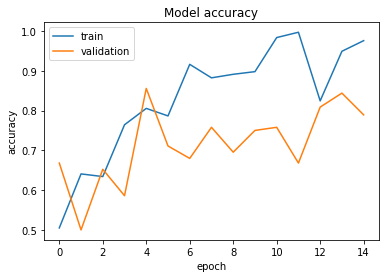

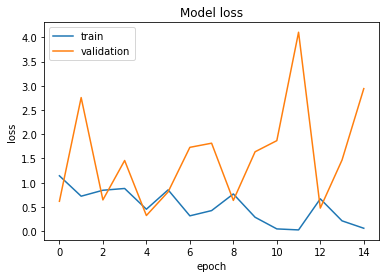

In [15]:
# Plotting the acuuracy and loss 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Implement Aumentation Wuth ImageGenerator

In [18]:
# Using image generator for preprocessing and labels

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                rescale=1.0/255,
                rotation_range = 30,
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                shear_range = 0.2,
                zoom_range = 0.2,
                horizontal_flip = True,
                fill_mode = 'nearest')
validation_datagen = ImageDataGenerator(
                     rescale=1.0/255,
                     rotation_range = 30,
                     width_shift_range = 0.2,
                     height_shift_range = 0.2,
                     shear_range = 0.2,
                     zoom_range = 0.2,
                     horizontal_flip = True,
                     fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
                  './horse-or-human',
                  target_size = (300, 300),
                  batch_size = 128,
                  class_mode = 'binary'
)


validition_generator = train_datagen.flow_from_directory(
                  './validition-horse-or-human',
                  target_size = (300, 300),
                  batch_size = 32,
                  class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [19]:
# Filtting the model

history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=2,
      validation_data = validition_generator,
      validation_steps=8)

Epoch 1/15
8/8 - 224s - loss: 0.6431 - accuracy: 0.7297 - val_loss: 1.2442 - val_accuracy: 0.5586 - 224s/epoch - 28s/step
Epoch 2/15
8/8 - 201s - loss: 0.4559 - accuracy: 0.7976 - val_loss: 1.1578 - val_accuracy: 0.6250 - 201s/epoch - 25s/step
Epoch 3/15
8/8 - 207s - loss: 0.3847 - accuracy: 0.8154 - val_loss: 2.1108 - val_accuracy: 0.6211 - 207s/epoch - 26s/step
Epoch 4/15
8/8 - 195s - loss: 0.6414 - accuracy: 0.7597 - val_loss: 1.1851 - val_accuracy: 0.5430 - 195s/epoch - 24s/step
Epoch 5/15
8/8 - 198s - loss: 0.6029 - accuracy: 0.7553 - val_loss: 1.1171 - val_accuracy: 0.5508 - 198s/epoch - 25s/step
Epoch 6/15
8/8 - 202s - loss: 0.5841 - accuracy: 0.7920 - val_loss: 0.9920 - val_accuracy: 0.6211 - 202s/epoch - 25s/step
Epoch 7/15
8/8 - 194s - loss: 0.3599 - accuracy: 0.8543 - val_loss: 1.3695 - val_accuracy: 0.6719 - 194s/epoch - 24s/step
Epoch 8/15
8/8 - 199s - loss: 0.4953 - accuracy: 0.8465 - val_loss: 1.5588 - val_accuracy: 0.6094 - 199s/epoch - 25s/step
Epoch 9/15
8/8 - 206s - 